# Pseudo Code 

For S1 and S2

1) First define when is cutoff between S1 or S2 (eg. 30 minutes long operation)  
2) Use the above value as the upper bound of S1   
3) Use the above value as the lower bound of S2  
4) Create a piecewise function where if x<a, return 0, x>b return 0 and if a<x<b, return a value (eg. 10)  

In [214]:
start_time = 30
end_time = 100
cutoff = 30
power = 10

## S1

In [215]:
import random

# Function to create the a and b constant of S1
# Rule: b - a < cutoff 
def s1_constants(): 
    a = random.randint(0, start_time)
    b = random.randint(a, a + cutoff)
    return a,b

# Given a and b 
# If x < a, return 0 because motor didn't start yet
# If a < x < b, return power since motor is active
# If x > b, return 0 because motor stopped operation
def s1(x,a,b):
 if(x < a): return 0
 if(a<=x<=b): return power 
 else: return 0

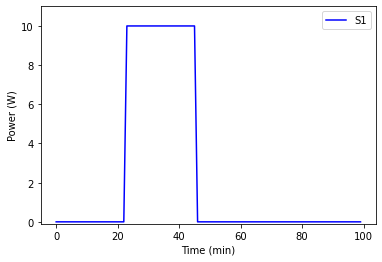

In [216]:
import matplotlib.pyplot as plt
import numpy as np


# Return a numpy array starting at 0-end_time with 1 as the increment
x = np.arange(0, end_time, 1)

# Get the a and b constant for this run
a, b = s1_constants()

# Use the s1 function to get the results for each time
y = []
for i in range(len(x)):
   y.append(s1(x[i], a, b))

# Plot the results
plt.plot(x,y,color='blue', label ="S1")
ax = plt.gca()
ax.set_ylim([-0.1, power+1])
ax.legend()
plt.xlabel("Time (min)")
plt.ylabel("Power (W)")

plt.show()

## S2

In [217]:
import random

# Function to create the a and b constant of S2
# Rule: b - a > cutoff
def s2_constants(): 
    a = random.randint(0, start_time)
    b = random.randint(a+cutoff, end_time)
    return a,b

# Given a and b 
# If x < a, return 0 because motor didn't start yet
# If a < x < b, return power since motor is active
# If x > b, return 0 because motor stopped operation
def s2(x,a,b):
 if(x < a): return 0
 if(a<=x<=b): return power 
 else: return 0

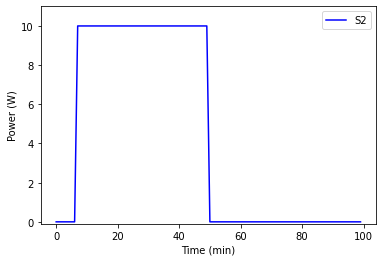

In [218]:
# Return a numpy array starting at 0-end_time with 1 as the increment
x = np.arange(0, end_time, 1)

# Get the a and b constant for this run
a, b = s2_constants()

# Use the s1 function to get the results for each time
y = []
for i in range(len(x)):
   y.append(s2(x[i], a, b))

# Plot the results
plt.plot(x,y,color='blue', label ="S2")
ax = plt.gca()
ax.set_ylim([-0.1, power+1])
ax.legend()
plt.xlabel("Time (min)")
plt.ylabel("Power (W)")

plt.show()

# Create Dataframe using Piecewise Function

https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-a-numpy-array-and-specify-the-index-column-and-column-headers/

In [219]:
# Return a numpy array starting at 0-end_time with 1 as the increment
x = np.arange(0, end_time, 1)

# Get the a and b constant for this run
a, b = s2_constants()

# Use the s1 function to get the results for each time
y = []
for i in range(len(x)):
   y.append(s2(x[i], a, b))

In [220]:
# Return a numpy array starting at 0-end_time with 1 as the increment
x = np.arange(0, end_time, 1)

# Get the a and b constant for this run
a, b = s2_constants()

# Use the s1 function to get the results for each time
y2 = []
for i in range(len(x)):
   y2.append(s2(x[i], a, b))

In [221]:
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [222]:
# Python program to Create a 
# Pandas DataFrame from a Numpy  
# array and specify the index 
# column and column headers
  
# import required libraries
import numpy as np
import pandas as pd
  
# creating a numpy array
numpyArray = np.array([y,y2])
  
# generating the Pandas dataframe
# from the Numpy array and specifying
# name of index and columns
panda_df = pd.DataFrame(data = numpyArray, 
                        index = ["Row_1", "Row_2"], 
                        columns = x)
  
# printing the dataframe
print(panda_df)

       0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  \
Row_1  10  10  10  10  10  10  10  10  10  10  ...   0   0   0   0   0   0   
Row_2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

       96  97  98  99  
Row_1   0   0   0   0  
Row_2   0   0   0   0  

[2 rows x 100 columns]


In [223]:
# Python program to Create a 
# Pandas DataFrame from a Numpy  
# array and specify the index 
# column and column headers
  
# import required libraries
import numpy as np
import pandas as pd
  
# creating a numpy array
numpyArray = np.array([y])
  
# generating the Pandas dataframe
# from the Numpy array and specifying
# name of index and columns
panda_df = pd.DataFrame(data = numpyArray, 
                        index = ["Row_1"], 
                        columns = x)
  
# printing the dataframe
print(panda_df)

       0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  \
Row_1  10  10  10  10  10  10  10  10  10  10  ...   0   0   0   0   0   0   

       96  97  98  99  
Row_1   0   0   0   0  

[1 rows x 100 columns]


In [224]:
lists = [y, y2]

numpyArray = np.array(lists)

panda_df = pd.DataFrame(data = numpyArray,
                        index = ['Run_' + str(i + 1) 
                        for i in range(numpyArray.shape[0])],
                        columns = x)
  
# printing the dataframe
print(panda_df)

       0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  \
Run_1  10  10  10  10  10  10  10  10  10  10  ...   0   0   0   0   0   0   
Run_2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

       96  97  98  99  
Run_1   0   0   0   0  
Run_2   0   0   0   0  

[2 rows x 100 columns]


In [225]:
lists = []

def s1_generator():
    # Return a numpy array starting at 0-end_time with 1 as the increment
    x = np.arange(0, end_time, 1)

    # Get the a and b constant for this run
    a, b = s1_constants()

    # Use the s1 function to get the results for each time
    y = []
    for i in range(len(x)):
       y.append(s1(x[i], a, b))
    return y

def s2_generator():
    # Return a numpy array starting at 0-end_time with 1 as the increment
    x = np.arange(0, end_time, 1)

    # Get the a and b constant for this run
    a, b = s2_constants()

    # Use the s1 function to get the results for each time
    y = []
    for i in range(len(x)):
       y.append(s2(x[i], a, b))
    return y

lists = []
for val in range(10): 
    lists.append(s1_generator())

In [229]:
numpyArray = np.array(lists)

panda_df = pd.DataFrame(data = numpyArray,
                        index = ['Run_' + str(i + 1) 
                        for i in range(numpyArray.shape[0])],
                        columns = x)